In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Data Loading and Inspection

In [2]:
insurance_data = pd.read_csv(r'C:\Users\dell\portfolio_projects\healthinsurance_try.csv')

In [3]:
# View the first 5 rows of the data
insurance_data.head(3)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2


In [4]:
# Determining the shape (number of rows and columns)
insurance_data.shape

(15000, 13)

`The dataset contains 15000 rows and 13 columns.`

In [5]:
# Unique records within "hereditary_diseases"
insurance_data['hereditary_diseases'].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [6]:
# Count of unique records in the 'city' column
insurance_data['city'].nunique()

91

# Data Preparation

In [7]:
# Check for missing data
insurance_data.isnull().any()

age                     True
sex                    False
weight                 False
bmi                     True
hereditary_diseases    False
no_of_dependents       False
smoker                 False
city                   False
bloodpressure          False
diabetes               False
regular_ex             False
job_title              False
claim                  False
dtype: bool

In [8]:
# Ascertaining the total number of missing recors
insurance_data.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

There are a total of 1352 missing records between age and bmi columns.

In [9]:
# Handling missing values within 'age' and 'bmi'
insurance_data.fillna(value={'age': insurance_data['age'].median(),
                            'bmi': insurance_data['bmi'].mean()}, inplace=True)

In [10]:
# Identifying number of duplicate rows
insurance_data.duplicated().sum()

1096

In [11]:
# Remove duplicate records
insurance_data.drop_duplicates(inplace=True)
insurance_data.duplicated().sum()

0

In [12]:
# Rename 'sex' to 'gender'
insurance_data.rename(columns={'sex': 'gender'}, inplace=True)
#insurance_data.head(2)

# Exploraory Data Analysis

###  Distribution of Policyholders by Age

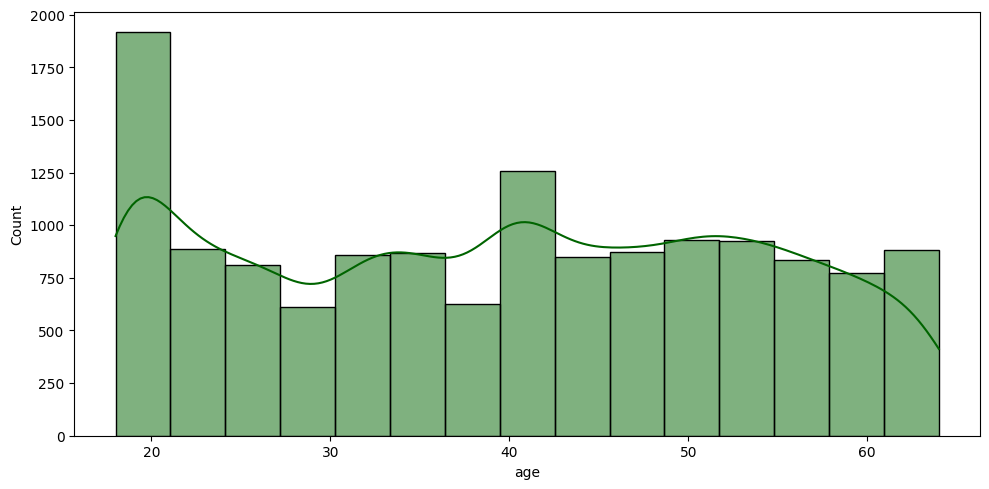

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=insurance_data, x='age', bins=15, color='darkgreen', kde=True)
plt.tight_layout()
plt.show()

### Distribution of Policyholders by BMI

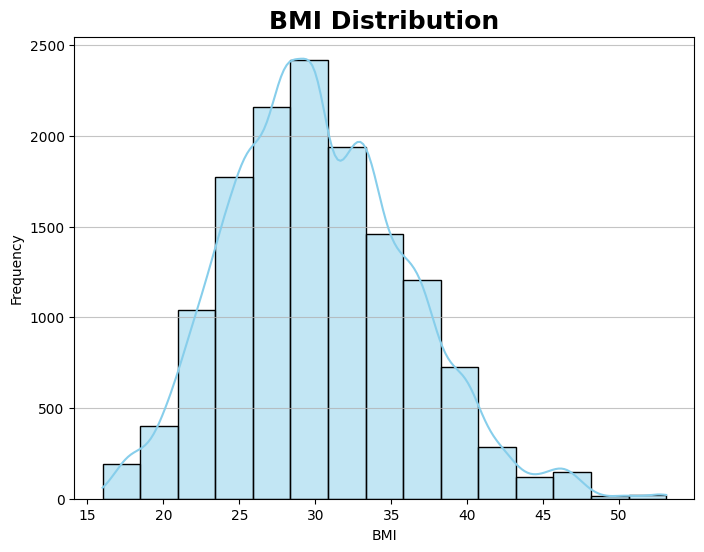

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=insurance_data, x='bmi', bins=15, kde=True, color='skyblue')
plt.title('BMI Distribution', fontsize=18, fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Distribution of Insurance claim 

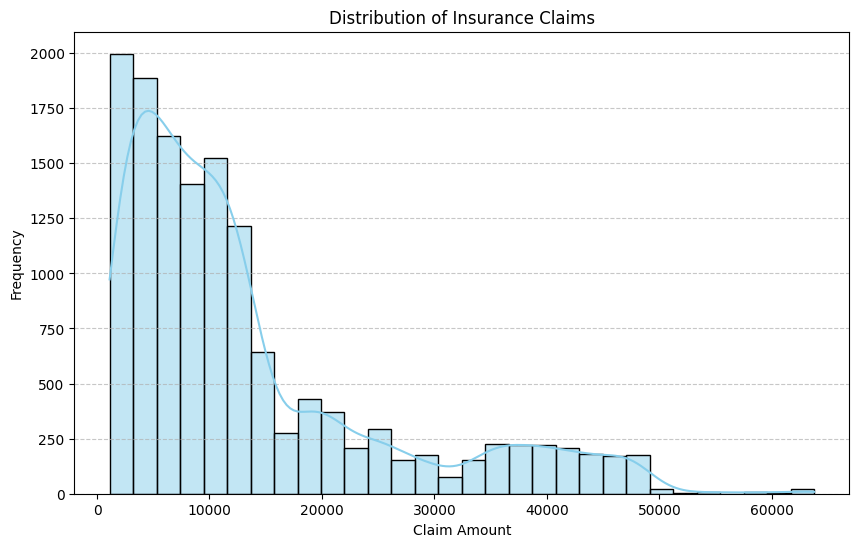

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['claim'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Insurance Claims')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

`The distribution of claim is skewed to the right`

### Distribution of Policyholders by Gender

In [ ]:
gender_counts = insurance_data['gender'].value_counts()
plt.figure(figsize=(3,3))
colors = sns.color_palette('pastel')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Policyholders by Gender', fontweight='bold')
plt.axis('equal')
plt.show()

`For every 1% male, there are 3% female filling for a claim. `

### Smoker Status of Policyholders

In [ ]:
gender_counts = insurance_data['smoker'].value_counts()
plt.figure(figsize=(3,3))
colors = sns.color_palette('pastel')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=40, colors=colors)
plt.title('Policyholders by Smoker Status', fontweight='bold')
plt.axis('equal')
plt.show()

#### `Non-smokers in the population are approximately 4 times more than smokers`

## Diabetes Status

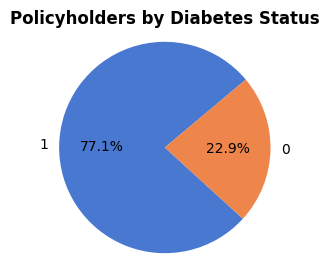

In [17]:
gender_counts = insurance_data['diabetes'].value_counts()
plt.figure(figsize=(3,3))
colors = sns.color_palette('muted')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=40, colors=colors)
plt.title('Policyholders by Diabetes Status', fontweight='bold')
plt.axis('equal')
plt.show()

#### `A large number of the policyholders have diabetes.`

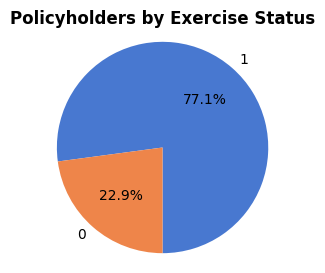

In [18]:
counts = insurance_data['regular_ex'].value_counts()
plt.figure(figsize=(3,3))
colors = sns.color_palette('muted')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('Policyholders by Exercise Status', fontweight='bold')
plt.axis('equal')
plt.show()

### Distribution of Number of Dependents of Policyholders

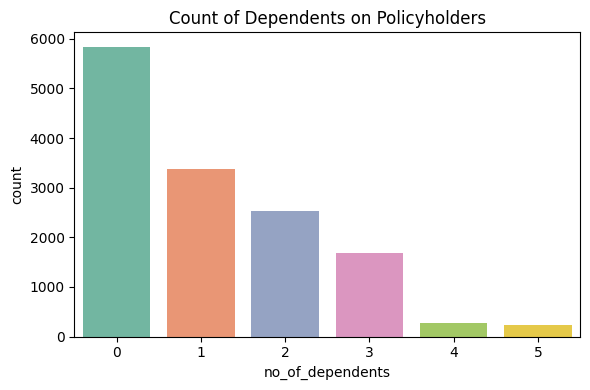

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=insurance_data, x='no_of_dependents', palette='Set2')
plt.title('Count of Dependents on Policyholders')
plt.tight_layout()
plt.show()

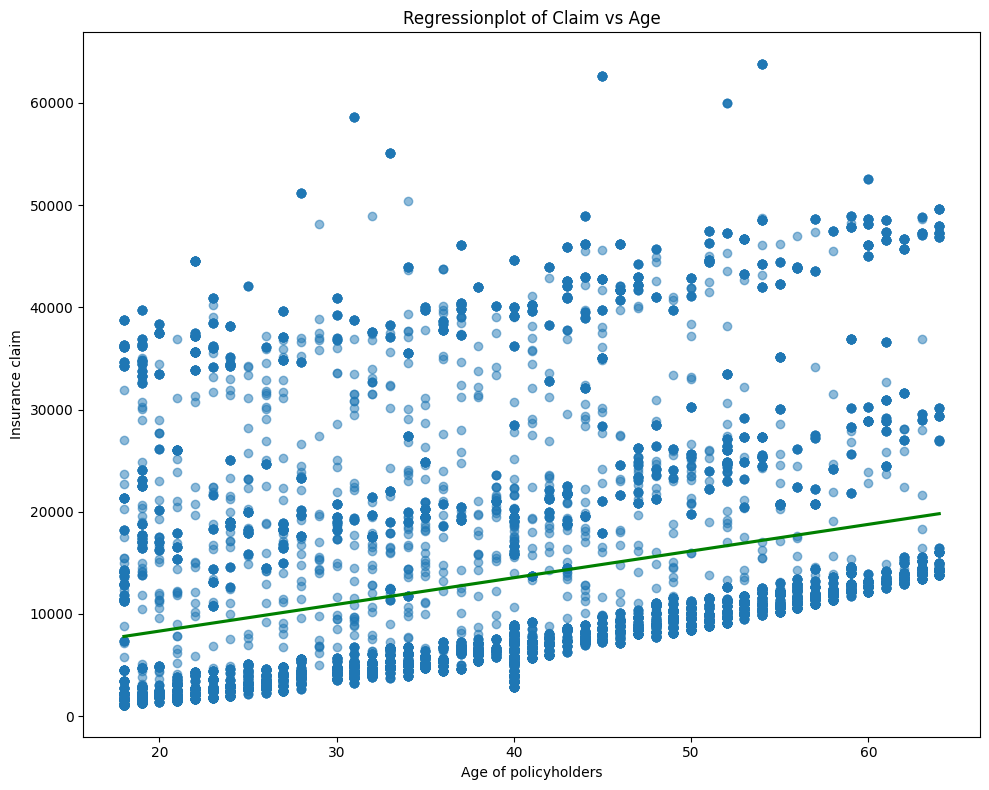

In [20]:
plt.figure(figsize=(10,8))
sns.regplot(data=insurance_data, x='age', y='claim', scatter_kws={'alpha':0.5}, ci=None, line_kws={'color': 'green'})
plt.ylabel('Insurance claim')
plt.xlabel('Age of policyholders')
plt.title('Regressionplot of Claim vs Age')
plt.tight_layout()
plt.show()

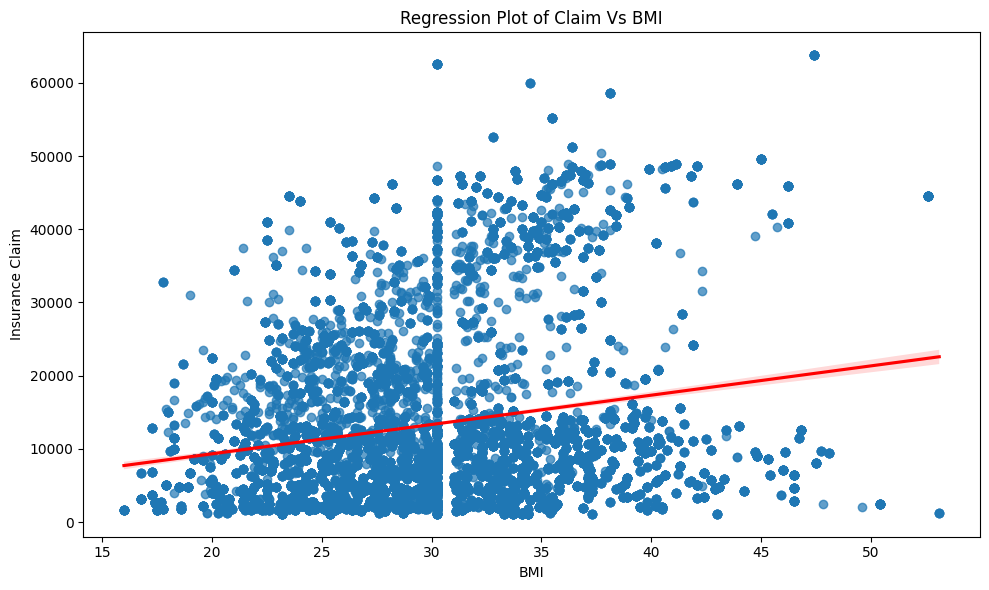

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=insurance_data, x='bmi', y='claim', scatter_kws={'alpha':0.7}, line_kws={'color': 'red'})
plt.ylabel('Insurance Claim')
plt.xlabel('BMI')
plt.title('Regression Plot of Claim Vs BMI')
plt.tight_layout()
plt.show()


### Claim Vs Age groups

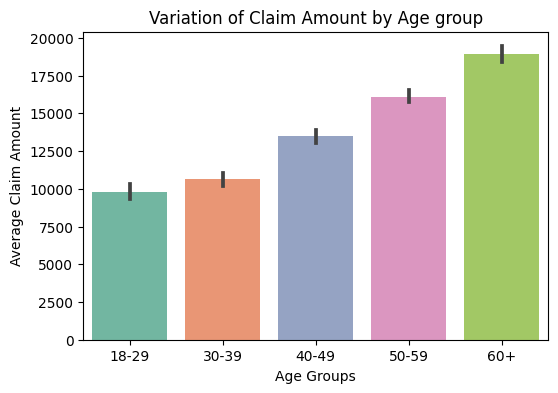

In [22]:
# Grouping Policyholders by Age
age_ranges = [18, 25, 35, 45, 55, 65]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=age_ranges, labels=labels)

# Visualizing the variation
age_groups = insurance_data.groupby('age_group')['claim'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data =insurance_data, x='age_group', y='claim', palette='Set2')
plt.xlabel('Age Groups')
plt.ylabel("Average Claim Amount")
plt.title("Variation of Claim Amount by Age group")
plt.show()

- `Claim amount increases as policyholders ages.`

### Claim Vs Gender Within Age groups

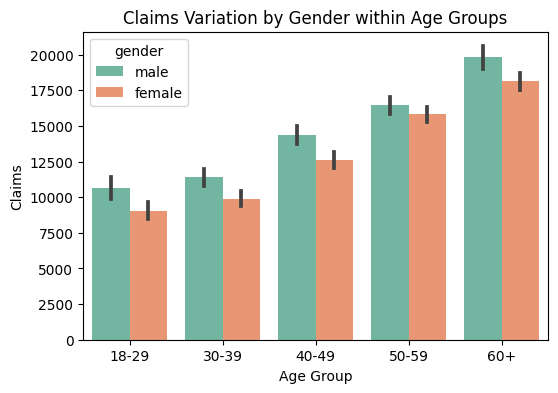

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(data=insurance_data, x='age_group', y='claim', hue='gender', palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Claims')
plt.title('Claims Variation by Gender within Age Groups')
plt.legend(title='gender')
plt.show()

- `Males of above 60years have the largest claims.`

### Claim Vs Smoker Status Within Age Groups

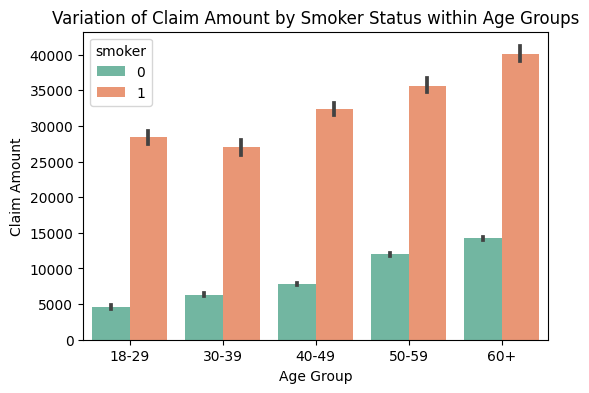

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data=insurance_data, x='age_group', y='claim', hue='smoker', palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.title('Variation of Claim Amount by Smoker Status within Age Groups')
plt.legend(title='smoker')
plt.show()

#### Claim vs Gender and Smoker Status

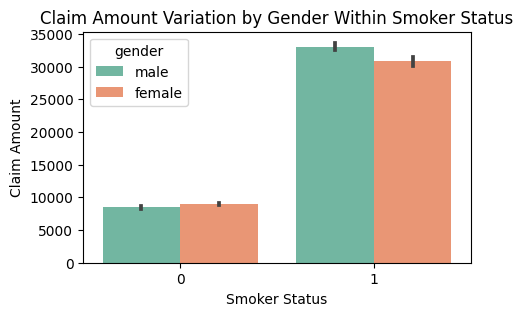

In [25]:
plt.figure(figsize=(5,3))
sns.barplot(data=insurance_data, x='smoker', y='claim', hue='gender', palette='Set2')
plt.xlabel('Smoker Status')
plt.ylabel('Claim Amount')
plt.title('Claim Amount Variation by Gender Within Smoker Status')
plt.legend(title='gender')
plt.show()

- `Among smokers, males have larger claims compared to females.`
- `For non-smokers, females have slightly higher claim than males. Though the claim amount is very small compared to the smokers'.`

### Claim Vs Gender Within Regular Exercise Status

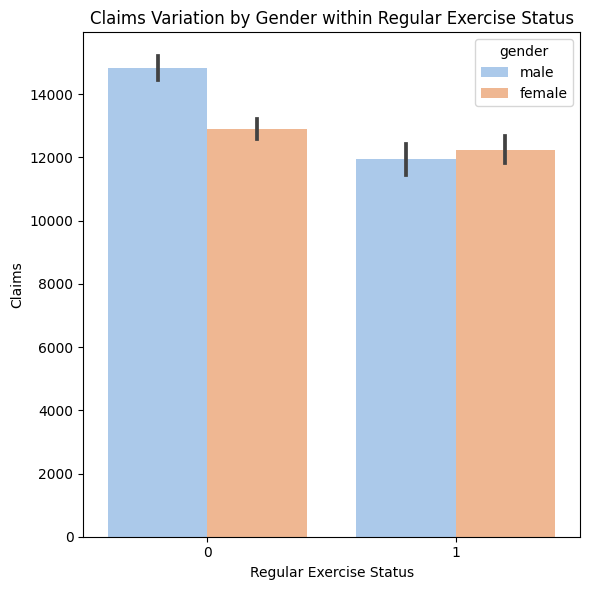

In [26]:
plt.figure(figsize=(6,6))
sns.barplot(data=insurance_data, x='regular_ex',y='claim',hue='gender', palette='pastel')
plt.xlabel('Regular Exercise Status')
plt.ylabel('Claims')
plt.title('Claims Variation by Gender within Regular Exercise Status')
plt.tight_layout()
plt.show()

- `Generally, those who do not exercise regular tend to have larger claim cost.`
- `Females in the regularly exercisng group have slightly higher claims than males.`

### Average Claim by Job Title

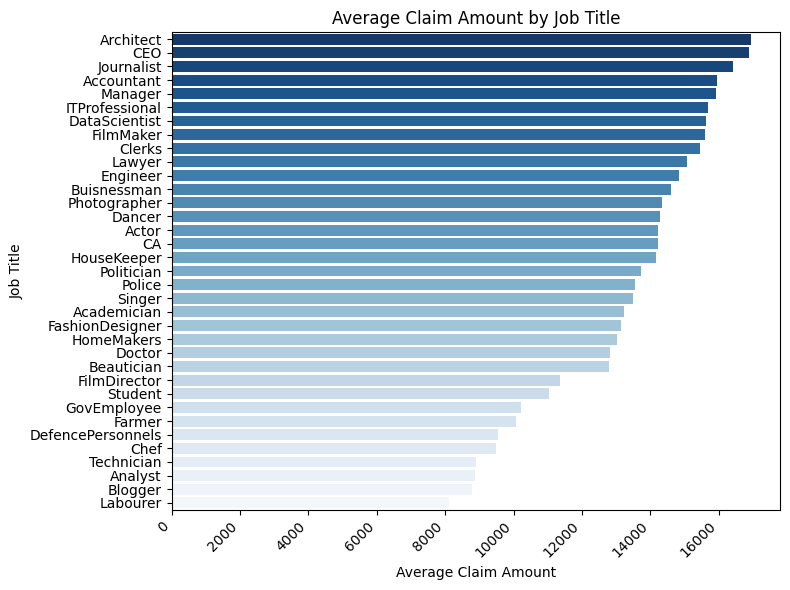

In [27]:
avg_claim_by_job = insurance_data.groupby('job_title')['claim'].mean().sort_values(ascending=False).reset_index().round(2)
avg_claim_by_job
colors = sns.color_palette('Blues_r', 35)
plt.figure(figsize=(8,6))
sns.barplot(data=avg_claim_by_job, x='claim', y='job_title', palette= colors)
plt.xlabel('Average Claim Amount')
plt.ylabel('Job Title')
plt.title('Average Claim Amount by Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- `Architect, CEO, Journalist, are the professions in the top 3 claim amount recipients.`
- `Analyst, Blogger and Labourer, are the bottom 3 claim recipients`

#### Claim Amount Vs Gender Within Diabetes Status

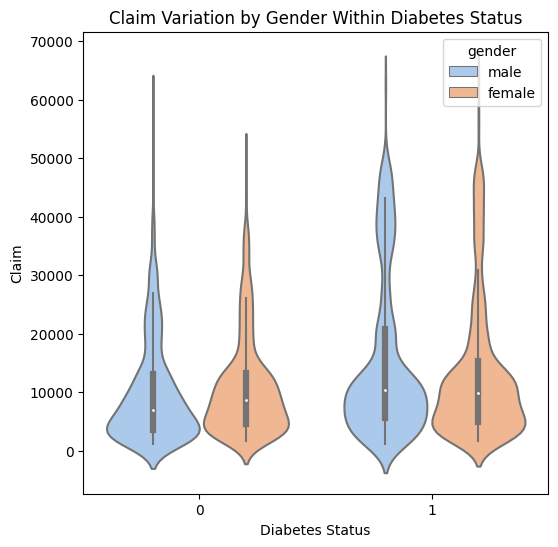

In [28]:
plt.figure(figsize=(6,6))
sns.violinplot(data=insurance_data, x='diabetes',y='claim',hue='gender', palette='pastel')
plt.xlabel('Diabetes Status')
plt.ylabel('Claim')
plt.title('Claim Variation by Gender Within Diabetes Status')
plt.show()

- `Though both groups have received large insurance claims, yet the diabetic group have higher insurance claim.`

# Descriptive Statistics

In [29]:
# Data Summary for 'age', 'bmi', and 'claim'
insurance_data[['age', 'bmi', 'claim']].describe()

,age,bmi,claim
count,13904.000000,13904.000000,13904.000000
mean,39.568110,30.273025,13431.813744
std,13.828128,5.923446,12142.099413
min,18.000000,16.000000,1121.900000
25%,27.000000,25.900000,4883.900000
50%,40.000000,29.900000,9567.000000
75%,51.000000,34.100000,16657.700000
max,64.000000,53.100000,63770.400000


In [30]:
# Modal values
modal_values = insurance_data[['age', 'claim']].mode()
print(modal_values)

    age    claim
0  18.0  14210.5


In [31]:
# Range
range_values = insurance_data[['age', 'claim']].max() - insurance_data[['age', 'claim']].min()
print(range_values)

age         46.0
claim    62648.5
dtype: float64


- `The mean, percentiles, and mode give understanding of the typical values around which the data is centered. `
- `The calculated range and standard deviation provide insights into the dispersion of the data points around the central values.`

In [32]:
# Summary statistics of Smoker Status

# Calculating counts and percentages
smoker_counts = insurance_data['smoker'].value_counts()
smoker_percentages = insurance_data['smoker'].value_counts(normalize=True) * 100

# Create a summary table
summary_table = pd.DataFrame({'Counts': smoker_counts, 'Percentages (%)': smoker_percentages})

# Display the summary table
print(summary_table)

        Counts  Percentages (%)
smoker                         
0        11114        79.933832
1         2790        20.066168


In [33]:
# Average, median and Total Claim by Gender
claim_stats_gender = insurance_data.groupby('gender')['claim'].agg(['mean', 'median', 'sum']).reset_index()
print(claim_stats_gender.round(2))

   gender      mean  median         sum
0  female  12748.32  9541.7  90398351.3
1    male  14143.19  9617.7  96357587.0


In [34]:
# Average and Total Claim Amounts by Smoker Status
claim_stats_smoker = insurance_data.groupby('smoker')['claim'].agg(['mean', 'sum']).reset_index()
print(claim_stats_smoker.round(2))

   smoker      mean         sum
0       0   8745.04  97192335.8
1       1  32101.65  89563602.5


# Correlation Analysis

#### Pearson's Correlation

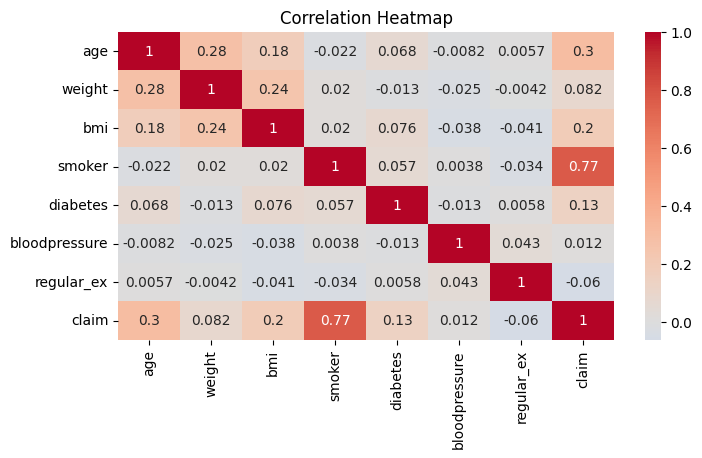

In [35]:
# Correlation Between Health metrics and Insurance fClaim
# Calculating correlation matrix
correlation_group = insurance_data[['age',  'weight', 'bmi', 'smoker', 'diabetes', 'bloodpressure', 'regular_ex',  'claim']]
correlation_matrix = correlation_group.corr()

# Using a heatmap to visualize the correlation
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### Spearman's Correlation

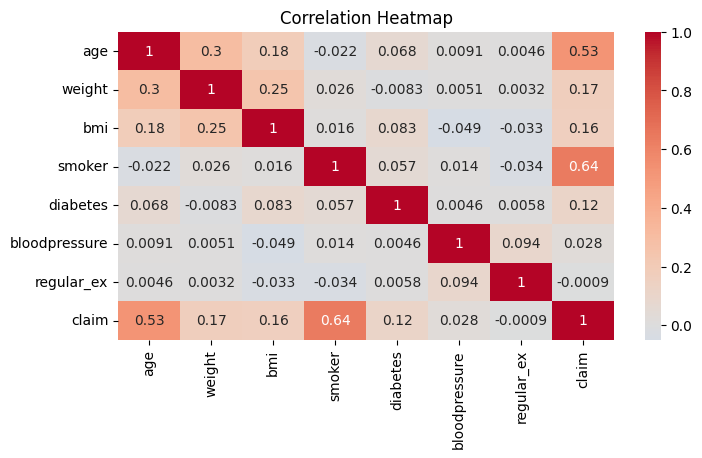

In [36]:
correlation_group = insurance_data[['age', 'weight', 'bmi', 'smoker', 'diabetes', 'bloodpressure', 'regular_ex', 'claim']]
spearman_corr = correlation_group.corr(method='spearman')

# Using a heatmap to visualize the correlation
plt.figure(figsize=(8,4))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

- `Increase in Age and Smoker status will likely cause a significant increase in insurance claim amount.` has maintained a significantly strong positive relationship with insurance claim in both correlations.`
- `Changes in Weight, BMI, Diabetes status and Blood Pressure may result in a slight positive change in Insurance claim .` Age is portrayed to have a weak positive relationship with claim using Pearson, while Spearman showed a stronger positive monotonic relationship with claim`
- `Regular exercise is extremely weak and negatively related with claim.`

# Statistical Test

### Independent T-Test 
- `Ho`: 'There is no statistically significant differece in the claim amounts between male and female policyholders.'
- `H1`: 'There is a statisticall significant difference in the claim amounts between male and female policyholder.'

In [37]:

# Separating data into male and female groups
male_claim_amounts = insurance_data[insurance_data['gender'] == 'male']['claim']
female_claim_amounts = insurance_data[insurance_data['gender'] == 'female']['claim']


# Calculate the difference in means
average_diff = male_claim_amounts.mean() - female_claim_amounts.mean()

# Independent t-test
t_stat, p_value = stats.ttest_ind(male_claim_amounts, female_claim_amounts)

# Print the results
print(f"Difference in Average Claims: {average_diff}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determining if the result is statistically significant
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in claim amounts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in claim amounts.")

Difference in Average Claims: 1394.872921755703
T-statistic: 6.782591793483701
P-value: 1.2280825436266949e-11
Reject the null hypothesis: There is a significant difference in claim amounts.


- `The null hypothesis (no difference between the average claim) is rejected.` 

# Predictive Analytics

### Feature Engineering

In [38]:
df = insurance_data.drop('age_group', axis=1)

In [39]:
# Label Encoding for Binary Variables ['gender']
df['gender'] = df['gender'].map({'female': 0, 'male': 1})

In [40]:
# One-hot Encoding for Nominal Variables

df = pd.get_dummies(df, columns=['hereditary_diseases', 'city', 'job_title'], drop_first=True)

In [42]:
# Standardization for Numerical Variables (Z-score Scaling)
standard_scaler = StandardScaler()
df[['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']] = standard_scaler.fit_transform(df[['age', 'weight', 'bmi', 
                                                                                    'no_of_dependents', 'bloodpressure']])

# Linear Regression Model

In [43]:
# Data Splitting

X = df.drop('claim', axis=1)
y = df['claim']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [44]:
# Model training and prediction
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, lr_pred))
r2 = r2_score(y_test, lr_pred)

# Print the model evaluation metrics
print(f"R-Squared, {r2:.2f}")
print(f"Root_Mean-Squared-Error, {rmse:.2f}")

R-Squared, 0.76
Root_Mean-Squared-Error, 5963.96


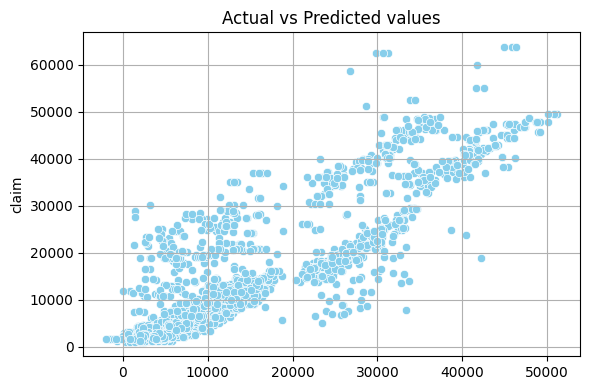

In [45]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=lr_pred,y=y_test, color='skyblue')
plt.title('Actual vs Predicted values')
plt.tight_layout()
plt.grid(True)
plt.show()

# Decision Tree Regression

In [46]:
# Create a Decision Tree Regressor
dtr_model = DecisionTreeRegressor()

# Fit the mode to the training data
dtr_model.fit(X_train, y_train)

# Make prediction on the test set
dtr_pred = dtr_model.predict(X_test)

# Decision Tree Regression Model Evaluation
r2 = r2_score(y_test, dtr_pred)
rmse = sqrt(mean_squared_error(y_test, dtr_pred))

print(f"R-Squared, {r2:.2f}")
print(f"Root_Mean-Squared-Error, {rmse:.2f}")

R-Squared, 0.96
Root_Mean-Squared-Error, 2556.03


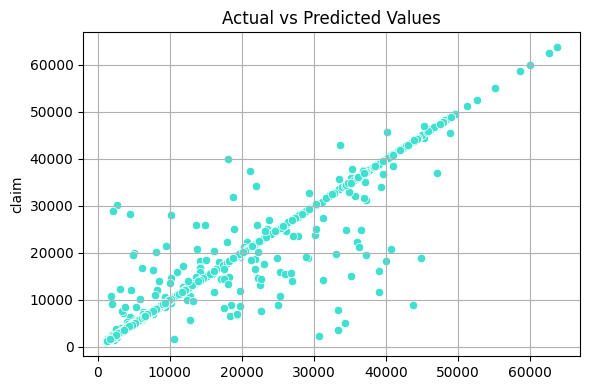

In [47]:
# Visualize the performance of the model
plt.figure(figsize=(6,4))
sns.scatterplot(x=dtr_pred,y=y_test, color = 'turquoise')
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.grid(True)
plt.show()

# Random Forests Regression

In [48]:
# Create Random Forests Regreesor
rfr_model = RandomForestRegressor()

# Fit the model on the training dataset
rfr_model.fit(X_train, y_train)

# Make prediction on the test set
rfr_pred = rfr_model.predict(X_test)

# Random Forest Model Evaluation
r2 = r2_score(y_test, rfr_pred)
rmse = sqrt(mean_squared_error(y_test, rfr_pred))

print(f"R-Squared, {r2:.2f}")
print(f"Root-Mean-Squared-Error, {rmse:.2f}")

R-Squared, 0.97
Root-Mean-Squared-Error, 2130.19


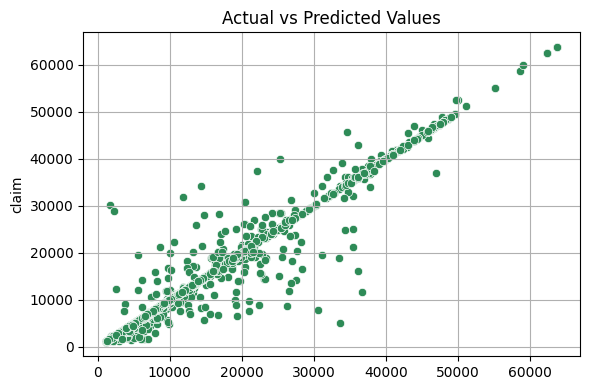

In [49]:
# Visualize the performance of the model
plt.figure(figsize=(6,4))
sns.scatterplot(x=rfr_pred,y=y_test, color = 'seagreen')
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.grid(True)
plt.show()

# Extreme Gradient Boosting (XGBoost)

In [50]:
# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Train the xgb_model on the training data
xgb_model.fit(X_train, y_train)

# Make a prediction on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, xgb_pred)
rmse = sqrt(mean_squared_error(y_test, xgb_pred))

print(f"R-Squared, {r2:.2f}")
print(f"Root_Mean-Squared-Error, {rmse:.2f}")

R-Squared, 0.96
Root_Mean-Squared-Error, 2359.56


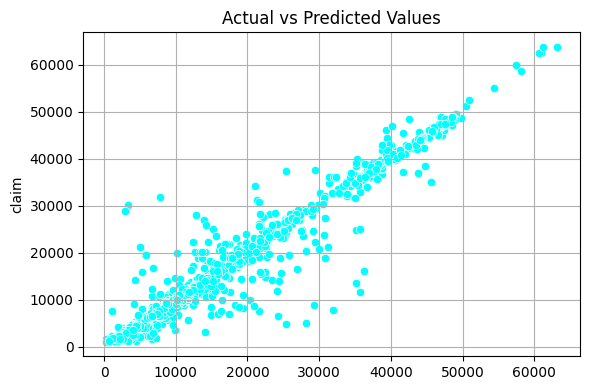

In [51]:
# Visualize the performance of the model
plt.figure(figsize=(6,4))
sns.scatterplot(x=xgb_pred,y=y_test, color = 'aqua')
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.grid(True)
plt.show()

# Models Performnace Analysis

In [52]:
print("Performance by models:")
print('--------------------------------------')
print("Linear Regression:",str(np.round(lr_model.score(X_test,y_test)*100,2)) + '%')
print("Decision Tree :",str(np.round(dtr_model.score(X_test,y_test)*100,2)) + '%')
print("Random Forests:",str(np.round(rfr_model.score(X_test,y_test)*100,2)) + '%')
print("XGBoost:",str(np.round(xgb_model.score(X_test,y_test)*100,2)) + '%')

Performance by models:
--------------------------------------
Linear Regression: 76.23%
Decision Tree : 95.63%
Random Forests: 96.97%
XGBoost: 96.28%


- `The best performing model is the Random Forest Regressor, having a prediction accuracy of  approximately 97%, 
which is closely followed by XGBoost Regressor having a a performance of more than 96%, Decision Tree Regressor having
an accuracy of approximately 95%, and Linear Regressor which has 
a predictive precision of more than 76%.`

- `The scatterplots provide visual assessments of the level of performance of each model. Random Forest, XGBoost, and Decision Tree
regression models show high concentration around xy-line, meaning that the predictions would be close to the actual values.
While the pattern in Linear regressor tells that the model's errors are not constant across the range of predictions.`